# Credit Card Customers - Trabajo de Curso

## Ciencias de Datos en Ingeniería

#### Autor: Doramas Báez Bernal

### Introducción 

Para este proyecto final se plantea aplicar las distintas técnicas aprendidas durante el curso para la resolución de problemas de ciencia de datos. En este caso, se ha seleccionado un conjunto de datos de clientes de un banco que presentan diversas características, como la edad, el estado civil, tipo de tarjeta, crédito límite, etc...

Por lo general, los directores de bancos suelen tener cierto interés por conocer cuando sus clientes van a abandonar sus servicios. Por lo tanto, es importante poder predecir que clientes tienen intenciones de cancelar sus servicios de tarjeta de crédito para intentar convencerles de que se queden.

[Dataset](https://www.kaggle.com/sakshigoyal7/credit-card-customers)

### Objetivos
- Realizar un análisis y una exploración de los datos.

- Hacer un preprocesamiento de los datos.

- Aplicar un algoritmo de aprendizaje automatico para encontrar un modelo que sea capaz de predecir el comportamiento de los clientes.




In [1]:
import pandas as pd
import numpy as np
import random 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import linear_model, metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

from imblearn.over_sampling import SMOTE

%matplotlib inline

#### Eliminación de columnas inservibles

En la definición del problema, se recomienda antes de realizar ningún tratamiento con los datos ignorar las 2 últimas columnas. 

In [2]:
datos = pd.read_csv("BankChurners.csv")
datos = datos[datos.columns[:-2]]
datos.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Exploración de los datos 

Es importante en un proyecto de ciencias de datos conocer con que datos estamos trabajando. Por este motivo, se realizará una exploración previa de las características generales que conformas a los clientes del banco.

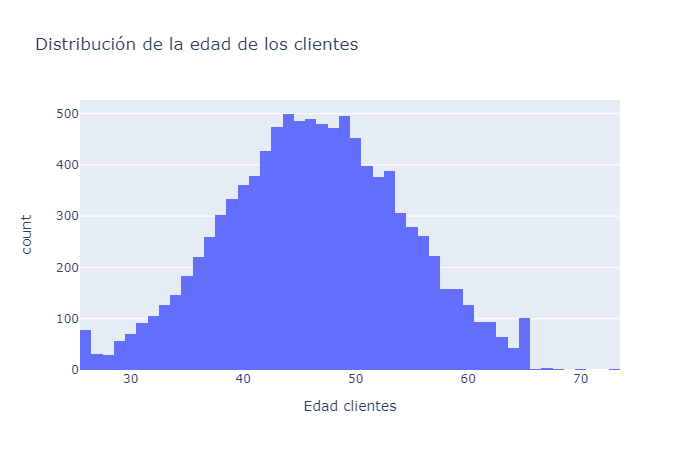

In [3]:
fig = px.histogram(datos, x='Customer_Age',
                   labels={'Customer_Age':'Edad clientes'},
                   title='Distribución de la edad de los clientes')              
fig.update_layout(height=350, width=1000)

fig.show("png")
fig.show("svg")

#### Edad de los clientes

- Se dispone de una distribución normal para la edad de los clientes. 

- El rango de edades registrado en los datos varía entre los 26 años y los 73 años. 

- Se puede observar que existe una concentración de clientes entre los 42 y los 50 años, se puede pensar que esto es debido a que las personas entre esas edades suelen tener unos trabajos estables y por lo tanto pueden permitirse contratar esos servicios de tarjetas de crédito.

In [4]:
fig = px.pie(datos, names='Gender', title='Proporción del género')
fig.show()                 

#### Género de los clientes

- Se presenta un número mayor de muestras femeninas, un 52.9% de muestras son mujeres y un 47.1% de hombres.

- Esta diferencia de muestras es poco relevante y se puede suponer que la proporción de género está balanceada.

In [5]:
fig = px.pie(datos, names='Education_Level', title='Proporción del nivel de educación')
fig.show() 

#### Nivel de educación de los clientes

- Se puede observar que alrededor del 40% de los clientes cuentan con unos estudios universitarios o superiores.

- Si suponemos que los clientes con nivel educativo desconocido carecen de educación, aun así, se puede afirmar que más del 70% de los clientes cuentan con un nivel educativo medio.

- Solo un 10% de los clientes conocidos cuentan con niveles universitarios superiores. Este aspecto es interesante, ya que, como es evidente este nivel de estudio es mucho más complejo y por ello, un menor número de personas son capaces de completarlos.

In [6]:
fig = px.pie(datos, names='Marital_Status', title='Proporción del estado civiles')
fig.show() 

#### Estado civil de los clientes

- Se puede observar que aproximadamente la mitad de los clientes del banco están casados y la otra mayoría están solteros. 

- Curiosamente solo un 7.39% de los clientes del banco están divorciados, cuando según datos de 2017 el ratio de divorcio consta del 44%. 

In [7]:
fig = px.pie(datos, names='Income_Category', title='Proporción del nivel de ingresos')
fig.show() 

#### Nivel de ingresos de los clientes

- Sobre un 75% de los clientes del banco tienen un ingreso inferior a $80k al año. 

- Solo un 7.18% de los clientes cuentan con unos suelos muy elevados, por encima de $120k al año.

- Se puede observar que el reparto monetario no es equitativo y a medida que se obtienen más ingresos el porcentaje de personas es menor. En general, se suele decir que el 1% más rico de la población contiene el 82% de la riqueza del mundo, por este motivo, tiene sentido esta distribución.

In [8]:
fig = px.pie(datos, names='Card_Category', title='Proporción de la categoría de tarjeta')
fig.show() 

#### Categoría de tarjeta de los clientes

- Como era de esperar, la mayoría de los clientes cuentan con la tarjeta más básica, un 93.2% disponen de la "blue card".

- Solo un 0.197% de los clientes tienen acceso a la "platinum card", esto te da acceso a los servicios más exclusivos del banco.

In [9]:
fig = px.pie(datos, names='Attrition_Flag', title='Proportion of churn vs not churn customers')
fig.show() 

#### Tasa de abandono de los clientes

- Como se puede apreciar, solo el 16% de las muestras representan clientes que han abandonado su servicio. 

- El conjunto de datos está desbalanceado, esto provocará problemas de cara al entrenamiento de un modelo. 

- Se debe aplicar tecnicas de undersampling u oversampling  para poder equilibirar el conjunto de datos.

## Preprocesado de los datos

Para poder trabajar correctamente con el conjunto de datos, es necesario realizar un preprocesamiento de los mismos. Con esto se quiere lograr un mejor rendimiento en la clasificación de los clientes. Para ello, seguiremos las distintas transformaciones.

- Conversión de tipos categoricos a nominales.

- Eliminación de columnas con valor "Unknown".

- Selección de variables.

- Balanceo del dataset. 


In [10]:
# Se utilizará de índice la identidad del cliente
datos = datos.set_index("CLIENTNUM")

# Conversión de valores str a numerico
datos['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1},inplace=True)
datos['Education_Level'].replace({'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,'Doctorate':5,'Unknown':np.NaN},inplace=True)

datos['Income_Category'].replace({'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5,'Unknown':np.NaN },inplace=True)
datos['Card_Category'].replace({'Blue':1,'Silver':2,'Gold':3,'Platinum':4},inplace=True)

datos['Gender'].replace({'M':0,'F':1}, inplace=True)

# One-Hot
datos.insert(6,'Single',datos['Marital_Status'],True)
datos.insert(6,'Divorced',datos['Marital_Status'],True)
datos.insert(6,'Unknown',datos['Marital_Status'],True)
datos.rename({'Marital_Status':'Married'},axis=1,inplace=True)
datos['Married'].replace({'Single':0, 'Married':1, 'Divorced':0, 'Unknown':0},inplace=True)
datos['Single'].replace({'Single':1, 'Married':0, 'Divorced':0, 'Unknown':0},inplace=True)
datos['Divorced'].replace({'Single':0, 'Married':0, 'Divorced':1, 'Unknown':0},inplace=True)
datos['Unknown'].replace({'Single':0, 'Married':0, 'Divorced':0, 'Unknown':1},inplace=True)

#### Tratamiento de valores "Unknown"

En este caso, las columnas con valores "Unknown" serán tratadas como valores nulos y por lo tanto, será necesario que realizar un preprocesamiento de los mismos. En este caso, para la resolución de este problema se aplicará una de las técnicas de imputación utilizadas durante el curso, en concreto el algoritmo Mice.

Se ha seleccionado como técnica de imputación de variables el algoritmo Mice, puesto que, después de aplicar diversos algoritmos durante el curso este era el que producía mejores resultados.

In [11]:
def Mice(dataset,iterations):
    datos_Mice = dataset.copy()
    colums_names = list(datos_Mice.columns)


    for i in range(datos_Mice.shape[1]):
        variables_perdidas = dataset.iloc[:,i].isnull() # Se obtienen valores nulos del conjunto de datos original
        media_variables = datos_Mice.loc[~variables_perdidas,colums_names[i]].mean()
        datos_Mice.loc[variables_perdidas,colums_names[i]] = media_variables

    for _ in range(iterations):
        # Prediccion por regresion lineal
        for j in range(datos_Mice.shape[1]):
            variables_perdidas = dataset.iloc[:,j].isnull() 
            datos_Mice.loc[variables_perdidas,colums_names[j]] = np.nan # Paso 2 MICE

            matrix_perdidos = datos_Mice.loc[variables_perdidas].values
            matrix_no_perdidos = datos_Mice.loc[~variables_perdidas].values

            x_perdidos = np.delete(matrix_perdidos,j,axis=1)
            x = np.delete(matrix_no_perdidos,j,axis=1)
            y = matrix_no_perdidos[:,j]

            modelo_regresion = linear_model.LinearRegression()
            modelo_regresion.fit(x,y)   
            
            if x_perdidos.shape[0] > 1:
                variables_pred = modelo_regresion.predict(x_perdidos)  
                datos_Mice.loc[variables_perdidas,colums_names[j]] = variables_pred
                
    return datos_Mice


In [12]:
datos = Mice(datos,20)

In [13]:
datos.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Married,Unknown,Divorced,Single,Income_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,0.0,45.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,3.0,...,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
818770008,0.0,49.0,1.0,5.0,3.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
713982108,0.0,51.0,0.0,3.0,3.0,1.0,0.0,0.0,0.0,4.0,...,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
769911858,0.0,40.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,1.0,...,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
709106358,0.0,40.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,3.0,...,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000


<AxesSubplot:>

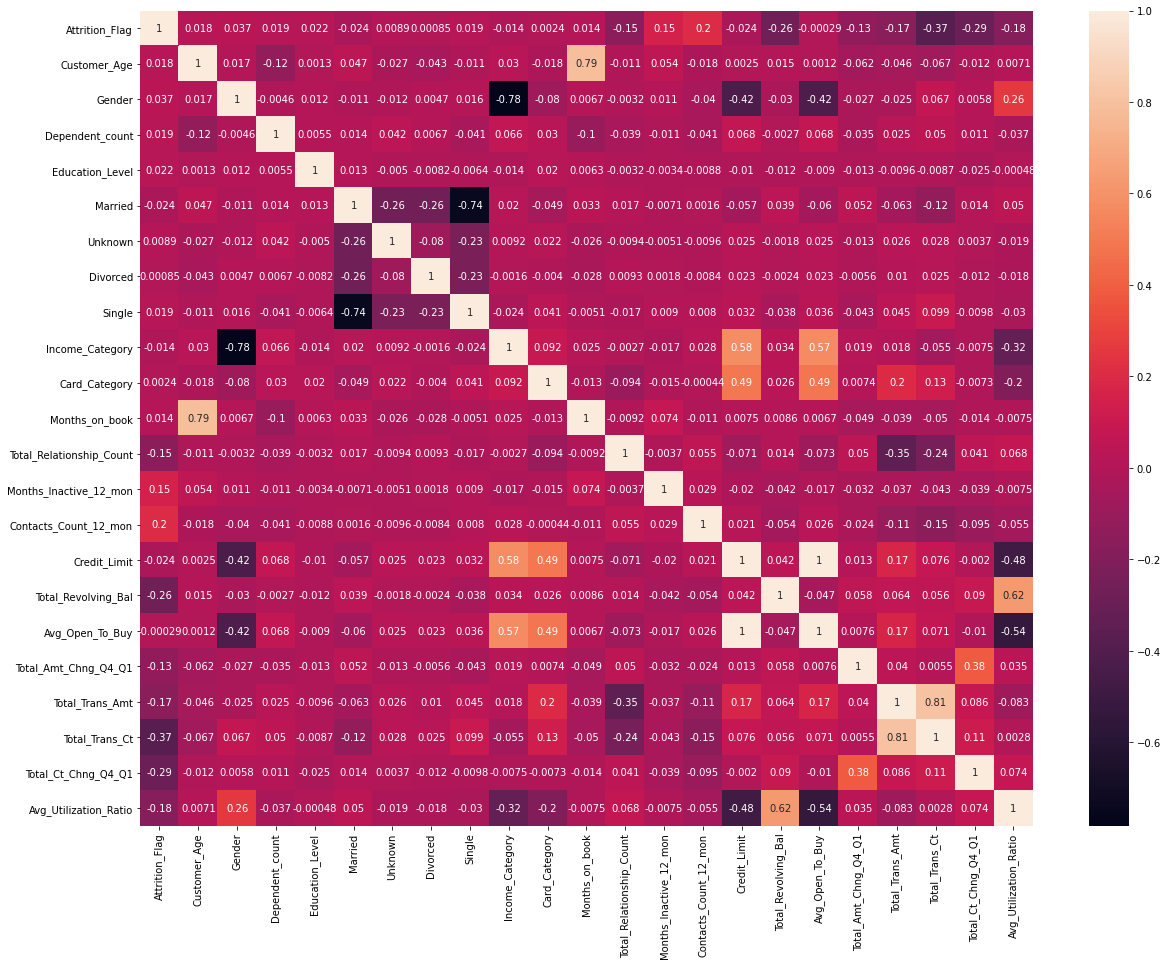

In [14]:
plt.subplots(figsize=(20,15))
sns.heatmap(datos.corr('pearson'),annot=True)

#### Balanceo del dataset

Uno de los pasos primordiales antes de proceder al entrenamiento del modelo, es el balanceo del conjunto de datos. En este caso, el valor a predecir por el modelo es la tasa de abandono de los clientes y como se comentó anteriormente, los datos estaban desbalanceados. Por lo tanto, es necesario decidir entre utilizar los datos por defecto, aplicar una técnica de undersampling o de aplicar una tecnica de oversampling.

En este caso se va a utilizar una técnica de oversamplig, SMOTE es una técnica estadística para aumentar el número de casos en un conjunto de datos de forma equilibrada. Consiste en generar nuevas instancias a partir de casos minoritarios existentes proporcionados como entrada.


In [15]:
x_data = datos.iloc[:,1:]
y_data = datos.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,train_size=0.80)

x_train, x_validation, y_train, y_validation = train_test_split(x_train,y_train,train_size=0.85)

print( "Dimensiones de los datos x de entrenamiento: ",  x_train.shape)
print("Dimensiones de los datos x de test: ", x_test.shape)
print("Dimensiones de los datos y de entrenamiento: ", y_train.shape)
print("Dimensiones de los datos y de test: ",y_test.shape)

Dimensiones de los datos x de entrenamiento:  (6885, 22)
Dimensiones de los datos x de test:  (2026, 22)
Dimensiones de los datos y de entrenamiento:  (6885,)
Dimensiones de los datos y de test:  (2026,)


In [16]:
oversample = SMOTE()

print("Tasa de abandono de los clientes:")
print(y_train.value_counts())

x_train_upsampled, y_train_upsampled = oversample.fit_resample(x_train,y_train)

print("\nTasa de abandono de los clientes después de realizar el oversampling:")
print( y_train_upsampled.value_counts())

Tasa de abandono de los clientes:
0.0    5766
1.0    1119
Name: Attrition_Flag, dtype: int64

Tasa de abandono de los clientes después de realizar el oversampling:
1.0    5766
0.0    5766
Name: Attrition_Flag, dtype: int64


## Entrenamiento del modelo

Una vez realizado todo el preprocesamiento de los datos y se dispone de un conjunto de datos balanceado, se podrá entrenar el modelo. En este caso, se va a utilizar como clasificador un randomForest.

In [17]:
def train_classifier(classifier, Xtrain, Ytrain, Xtest, Ytest):
    classifier.fit(Xtrain,Ytrain)
    Ypredicted = classifier.predict(Xtest)
    print('Accuracy: {:.2f}'.format(accuracy_score(Ytest,Ypredicted)*100))
    print('Precision: {:.2f}'.format(precision_score(Ytest,Ypredicted,average='macro')*100))
    print('Recall: {:.2f}'.format(recall_score(Ytest,Ypredicted,average='macro')*100))

    return classifier

In [18]:
rf = RandomForestClassifier(n_jobs=-1)
model = train_classifier(rf, x_train_upsampled,y_train_upsampled,x_test,y_test)

Accuracy: 95.71
Precision: 92.15
Recall: 91.15


In [19]:
y_predicted = model.predict(x_validation)
print('Accuracy: {:.2f}'.format(accuracy_score(y_validation,y_predicted)*100))
print('Precision: {:.2f}'.format(precision_score(y_validation,y_predicted,average='macro')*100))
print('Recall: {:.2f}'.format(recall_score(y_validation,y_predicted,average='macro')*100))

Accuracy: 96.05
Precision: 92.88
Recall: 92.53


## Conclusiones

1. Se obtiene un accuracy bueno tanto para los valores de test como el conjunto de validación.

2. Se obtiene un recall aproximado del 90%, esto significa que un 90% de los valores positivos fueron correctamente identificados.

3. Es prácticamente indispensable realizar el balanceo de los datos, si no se hubiese realizado este balanceo, el comportamiento del modelo presentaría un sesgo. Por lo tanto, en la mayoría de casos solo se daría como valor de salida las personas que mantienen su tarjeta de crédito en activo.

En general, a partir de los resultados obtenidos se puede decir que aplicar técnicas de oversampling, en concreto SMOTE, para tratar con conjuntos de datos no balanceados es una buena opción. 
